# PyTorch Tutorial

# 텐서(TENSOR)
텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

텐서는 GPU나 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 NumPy 의 ndarray와 유사합니다. 실제로 텐서와 NumPy 배열(array)은 종종 동일한 내부(underly) 메모리를 공유할 수 있어 데이터를 복수할 필요가 없습니다. 텐서는 또한 자동 미분(automatic differentiation)에 최적화되어 있습니다. ndarray에 익숙하다면 Tensor API를 바로 사용할 수 있을 것입니다.

In [278]:
import torch
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time

In [279]:
torch.__version__

'1.12.1'

In [280]:
train_dataset = h5py.File('./datasets/train_signs.h5', "r")
test_dataset = h5py.File('./datasets/test_signs.h5', "r")

In [281]:
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'])

x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'])

In [282]:
print(x_train.shape)
print(y_train.shape)

(1080, 64, 64, 3)
(1080,)


## 텐서(tensor) 초기화

#### 데이터로부터 직접(directly) 생성하기
데이터로부터 직접 텐서를 생성할 수 있습니다. 데이터의 자료형(data type)은 자동으로 유추합니다.
```python
torch.tensor(data)
```

In [283]:
data = [[1, 2], [3, 4]]
# YOUR CODE STARTS HERE
tensor_data = torch.tensor(data) 
# YOUR CODE ENDS HERE

In [284]:
tensor_data

tensor([[1, 2],
        [3, 4]])

#### NumPy 배열로부터 생성하기
텐서는 NumPy 배열로 생성할 수 있습니다.
```python
torch.from_numpy(np.ndarray)
```

In [285]:
array = np.array(data)
# YOUR CODE STARTS HERE
tensor_data = torch.from_numpy(array)
# YOUR CODE ENDS HERE

In [286]:
tensor_data

tensor([[1, 2],
        [3, 4]])

#### 다른 텐서로부터 생성하기
명시적으로 재정의(override)하지 않는다면, 인자로 주어진 텐서의 속성(모양(shape), 자료형(datatype))을 유지합니다.

In [287]:
tensor_ones = torch.ones_like(tensor_data)
tensor_ones

tensor([[1, 1],
        [1, 1]])

In [288]:
tensor_rand = torch.rand_like(tensor_data, dtype = torch.float)
tensor_rand

tensor([[0.9841, 0.1112],
        [0.8070, 0.5428]])

## 텐서의 속성(Attribute)
텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치(device)에 저장되는지를 나타냅니다.

```python
tensor.shape
tensor.dtype
tensor.device
```


In [289]:
tensor = torch.rand(3, 4)
# YOUR CODE STARTS HERE
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
# YOUR CODE ENDS HERE

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 텐서 연산(Operation)
전치(transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학 계산, 선형 대수, 임의 샘플링(random sampling) 등, 100가지 이상의 텐서 연산들을 여기 에서 확인할 수 있습니다.

기본적으로 텐서는 CPU에 생성됩니다. `.to` 메소드를 사용하면 (GPU의 가용성(availability)을 확인한 뒤) GPU로 텐서를 명시적으로 이동할 수 있습니다. 장치들 간에 큰 텐서들을 복사하는 것은 시간과 메모리 측면에서 비용이 많이든다는 것을 기억하세요!

In [290]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

#### NumPy식의 표준 인덱싱과 슬라이싱

In [291]:
torch.manual_seed(1)
tensor = torch.rand(4, 4)
# YOUR CODE STARTS HERE
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
# YOUR CODE ENDS HERE

First row: tensor([0.7576, 0.2793, 0.4031, 0.7347])
First column: tensor([0.7576, 0.0293, 0.5695, 0.6826])
Last column: tensor([0.7347, 0.7544, 0.5247, 0.4550])


**Expected output**
```
First row: tensor([0.7576, 0.2793, 0.4031, 0.7347])
First column: tensor([0.7576, 0.0293, 0.5695, 0.6826])
Last column: tensor([0.7347, 0.7544, 0.5247, 0.4550])
```

#### 텐서 합치기 
`torch.cat`을 사용하여 주어진 차원에 따라 일련의 텐서를 연결할 수 있습니다.

In [292]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])
tensor3 = torch.tensor([7, 8, 9])

# YOUR CODE STARTS HERE
cat_tensor = torch.cat([tensor1, tensor2, tensor3])
# YOUR CODE ENDS HERE

In [293]:
cat_tensor

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

**Expected output**
```
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
```

`torch.stack`을 사용하여 tensor들을 새로운 차원으로 연결할 수 있습니다.

In [294]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])
tensor3 = torch.tensor([7, 8, 9])

# YOUR CODE STARTS HERE
# use dim = 0
dim0_tensor = torch.stack([tensor1, tensor2, tensor3], dim = 0)
# use dim = 1
dim1_tensor = torch.stack([tensor1, tensor2, tensor3], dim = 1)
# YOUR CODE ENDS HERE

In [295]:
print(f'stack dim = 0: \n {dim0_tensor}', end = '\n\n')
print(f'stack dim = 1: \n {dim1_tensor}')

stack dim = 0: 
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

stack dim = 1: 
 tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


**Expected output**
```
stack dim = 0: 
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

stack dim = 1: 
 tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
```

#### 산술 연산(Arithmetic operations)
`tensor.matmul`: 텐서 간 행렬 곱(matrix multiplication)을 계산합니다. (`@`로 사용가능)  

`tensor.mul`: 요소별 곱(element-wise product)을 계산합니다.(`*`로 사용가능)

In [296]:
tensor1 = torch.rand(3, 3)
tensor2 = torch.rand(3, 3)

matmul = tensor1.matmul(tensor2)
matmul = tensor1 @ tensor2

element_wise = tensor1.mul(tensor2)
element_wise = tensor1 + tensor2

In [297]:
print('matrix multiplication: \n', matmul, end = '\n\n')
print('element-wise product: \n', element_wise)

matrix multiplication: 
 tensor([[1.2185, 1.6380, 0.8020],
        [0.5399, 0.9417, 0.7155],
        [0.5523, 0.8445, 0.5182]])

element-wise product: 
 tensor([[1.0964, 1.2961, 1.7089],
        [0.6668, 1.1238, 0.8377],
        [1.3905, 1.1144, 0.3842]])


# 자동미분(Autograd)
신경망을 학습할 때 가장 자주 사용되는 알고리즘은 역전파입니다. 이 알고리즘에서, 매개변수(모델 가중치)는 주어진 매개변수에 대한 손실 함수의 변화도(gradient)에 따라 조정됩니다.

이러한 변화도를 계산하기 위해 PyTorch에는 torch.autograd라고 불리는 자동 미분 엔진이 내장되어 있습니다. 이는 모든 계산 그래프에 대한 변화도의 자동 계산을 지원합니다.

#### Linear Function
Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1)

이 신경망에서, w와 b는 최적화를 해야 하는 매개변수입니다. 따라서 이러한 변수들에 대한 손실 함수의 변화도를 계산할 수 있어야 합니다. 이를 위해서 해당 텐서에 requires_grad 속성을 설정합니다.  
**note**: requires_grad의 값은 텐서를 생성할 때 설정하거나, 나중에 x.requires_grad_(True) 메소드를 사용하여 나중에 설정할 수도 있습니다.

In [298]:
y = torch.FloatTensor([10, 14, 13, 15]).view(4, 1)

torch.manual_seed(1)
X = torch.randn(3, 1)
W = torch.randn(4, 3, requires_grad = True)
b = torch.randn(4, 1, requires_grad = True)
loss = torch.nn.MSELoss()

# YOUR CODE STARTS HERE
Z = torch.matmul(W, X) + b
cost = loss(Z, y)
# YOUR CODE ENDS HERE

In [299]:
print('Z : \n', Z, end = '\n\n')
print('cost : \n', cost)

Z : 
 tensor([[ 0.5474],
        [-1.3898],
        [-1.1248],
        [-1.9337]], grad_fn=<AddBackward0>)

cost : 
 tensor(203.1145, grad_fn=<MseLossBackward0>)


**Expected output**
```
Z : 
 tensor([[ 0.5474],
        [-1.3898],
        [-1.1248],
        [-1.9337]], grad_fn=<AddBackward0>)

cost : 
 tensor(203.1145, grad_fn=<MseLossBackward0>)
```

이 코드는 다음의 연산 그래프 를 정의합니다.
![graph](https://tutorials.pytorch.kr/_images/comp-graph.png)

#### 변화도(Gradient) 계산하기
신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수(derivative)를 계산해야 합니다. 즉, x와 y의 일부 고정값에서 $\frac{\partial loss}{\partial w}$와 $\frac{\partial loss}{\partial b}$가 필요합니다. 이러한 도함수를 계산하기 위해, `cost.backward()`를 호출한 다음 `W.grad`와 `b.grad`에서 값을 가져옵니다:


- 연산 그래프의 잎(leaf) 노드들 중 `requires_grad` 속성이 True로 설정된 노드들의 grad 속성만 구할 수 있습니다. 그래프의 다른 모든 노드에서는 변화도가 유효하지 않습니다.

- 성능 상의 이유로, 주어진 그래프에서의 backward를 사용한 변화도 계산은 한 번만 수행할 수 있습니다. 만약 동일한 그래프에서 여러번의 backward 호출이 필요하면, backward 호출 시에 `retrain_graph=True`를 전달해야 합니다.


In [300]:
# YOUR CODE STARTS HERE
cost.backward()
# YOUR CODE ENDS HERE

print(W.grad)
print(b.grad)

tensor([[-3.1258, -1.2616, -0.2915],
        [-5.0890, -2.0540, -0.4746],
        [-4.6707, -1.8851, -0.4356],
        [-5.5996, -2.2600, -0.5222]])
tensor([[-4.7263],
        [-7.6949],
        [-7.0624],
        [-8.4668]])


**Expected output**
```
tensor([[-3.1258, -1.2616, -0.2915],
        [-5.0890, -2.0540, -0.4746],
        [-4.6707, -1.8851, -0.4356],
        [-5.5996, -2.2600, -0.5222]])
tensor([[-4.7263],
        [-7.6949],
        [-7.0624],
        [-8.4668]])
```

#### 변화도 추적 멈추기
기본적으로, `requires_grad=True`인 모든 텐서들은 연산 기록을 추적하고 변화도 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 순전파 연산만 필요한 경우에는, 이러한 추적이나 지원이 필요 없을 수 있습니다. 연산 코드를 `torch.no_grad()` 블록으로 둘러싸서 연산 추적을 멈출 수 있습니다.



In [301]:
Z = torch.matmul(W, X) + b
print(Z.requires_grad)

True


In [302]:
with torch.no_grad():
    Z = torch.matmul(W, X) + b
    print(Z.requires_grad)

False


동일한 결과를 얻는 다른 방법은 텐서에 `detach()`메소드를 사용하는 것입니다

In [303]:
Z = torch.matmul(W, X)+b
Z_det = Z.detach()
print(Z_det.requires_grad)

False


# PyTorch Dataset & DataLoader
데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다. 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다. PyTorch는 `torch.utils.data.DataLoader` 와 `torch.utils.data.Dataset` 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다. `Dataset` 은 샘플과 정답(label)을 저장하고, `DataLoader` 는 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.


## PyTorch Dataset

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: \_\_init\_\_, \_\_len\_\_, and \_\_getitem\_\_. 

`__init__`  
\_\_init\_\_ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다. 

`__len__`  
\_\_len\_\_ 함수는 데이터셋의 샘플 개수를 반환합니다.

`__getitem__`  
\_\_getitem\_\_ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.


In [304]:
from torch.utils.data import Dataset, DataLoader

In [305]:
class Custom_Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        # normalize(/255.0)
        # YOUR CODE STARTS HERE
        normalized_x = self.x[idx] / 255.0
        # YOUR CODE ENDS HERE
        return {
            'x' : normalized_x,
            'y' : self.y[idx]
        }

In [306]:
train_custom_dataset = Custom_Dataset(x_train, y_train)
test_custom_dataset = Custom_Dataset(x_test, y_test)

In [307]:
type(train_custom_dataset)

__main__.Custom_Dataset

In [308]:
print('__len__ :', len(train_custom_dataset))
print('__len__ :', train_custom_dataset.__len__())

__len__ : 1080
__len__ : 1080


In [309]:
print('__getitem__ :', train_custom_dataset[0])
print('__getitem__ :', train_custom_dataset.__getitem__(0))

__getitem__ : {'x': array([[[0.89019608, 0.8627451 , 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        [0.89019608, 0.87058824, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.87058824],
        [0.90196078, 0.89803922, 0.86666667]],

       [[0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        [0.89411765, 0.86666667, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.87058824],
        [0.90588235, 0.89803922, 0.86666667]],

       [[0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.8745098 ],
        [0.90196078, 0.89803922, 0.86666667]],

       ...,

       [[0.46666667, 0.31764706, 0.2       ],
        [0.48627451, 0.33333333, 0.21568627],
  

## PyTorch DataLoader
`Dataset` 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다. `DataLoader` 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.

`DataLoader` 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다. 아래의 각 순회(iteration)는 (각각 batch_size=64 의 특징(feature)과 정답(label)을 포함하는) train_features 와 train_labels 의 묶음(batch)을 반환합니다. shuffle=True 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다.

In [310]:
train_loader = DataLoader(train_custom_dataset,
                          batch_size = 64,
                          shuffle = True)
test_loader = DataLoader(test_custom_dataset,
                         batch_size = 64,
                         shuffle = True)

since PyTorch DataLoader are generators, you can't access directly the contents unless you iterate over them in a for loop, or by explicitly creating a Python iterator using iter and consuming its elements using next.


In [311]:
print('data dictionary :', next(iter(train_loader)))

data dictionary : {'x': tensor([[[[0.8863, 0.8549, 0.8118],
          [0.8902, 0.8549, 0.8118],
          [0.8902, 0.8588, 0.8118],
          ...,
          [0.9059, 0.8745, 0.8353],
          [0.9020, 0.8745, 0.8314],
          [0.8980, 0.8706, 0.8314]],

         [[0.8863, 0.8549, 0.8118],
          [0.8902, 0.8549, 0.8118],
          [0.8863, 0.8549, 0.8118],
          ...,
          [0.9059, 0.8784, 0.8353],
          [0.9020, 0.8745, 0.8353],
          [0.8980, 0.8706, 0.8314]],

         [[0.8863, 0.8549, 0.8078],
          [0.8902, 0.8549, 0.8118],
          [0.8863, 0.8588, 0.8157],
          ...,
          [0.9020, 0.8745, 0.8392],
          [0.8980, 0.8745, 0.8353],
          [0.8980, 0.8706, 0.8314]],

         ...,

         [[0.8078, 0.7843, 0.7569],
          [0.8157, 0.7843, 0.7608],
          [0.8196, 0.7843, 0.7569],
          ...,
          [0.7843, 0.7725, 0.7647],
          [0.7843, 0.7725, 0.7608],
          [0.7804, 0.7725, 0.7608]],

         [[0.8078, 0.7804, 0.

In [312]:
print('x :', next(iter(train_loader))['x'])
print('shape of x :', next(iter(train_loader))['x'].size()) # (batch size, w, h, c)

x : tensor([[[[0.8941, 0.8706, 0.8431],
          [0.8941, 0.8706, 0.8431],
          [0.8941, 0.8745, 0.8471],
          ...,
          [0.9137, 0.9059, 0.8784],
          [0.9137, 0.9059, 0.8784],
          [0.9137, 0.9020, 0.8745]],

         [[0.8941, 0.8706, 0.8431],
          [0.8941, 0.8706, 0.8431],
          [0.8941, 0.8706, 0.8471],
          ...,
          [0.9137, 0.9059, 0.8784],
          [0.9137, 0.9059, 0.8824],
          [0.9098, 0.9020, 0.8784]],

         [[0.8902, 0.8667, 0.8392],
          [0.8902, 0.8706, 0.8431],
          [0.8941, 0.8745, 0.8471],
          ...,
          [0.9098, 0.9059, 0.8863],
          [0.9098, 0.9059, 0.8824],
          [0.9059, 0.9020, 0.8784]],

         ...,

         [[0.3882, 0.2275, 0.1294],
          [0.3843, 0.2314, 0.1373],
          [0.3804, 0.2314, 0.1333],
          ...,
          [0.8275, 0.8314, 0.8275],
          [0.8235, 0.8314, 0.8275],
          [0.8275, 0.8275, 0.8275]],

         [[0.3843, 0.2314, 0.1294],
          [0.

In [313]:
print('y :', next(iter(train_loader))['y'])
print('shape of y :', next(iter(train_loader))['y'].size()) # (batch size,)

y : tensor([5, 1, 0, 2, 1, 3, 0, 4, 2, 2, 1, 4, 5, 3, 3, 4, 0, 5, 1, 1, 0, 1, 4, 4,
        5, 5, 2, 2, 5, 0, 4, 0, 5, 2, 4, 2, 5, 0, 2, 0, 5, 2, 5, 0, 3, 1, 5, 3,
        0, 0, 4, 5, 2, 4, 2, 5, 5, 4, 5, 0, 0, 5, 5, 0])
shape of y : torch.Size([64])


The dataset that you'll be using during this assignment is a subset of the sign language digits. It contains six different classes representing the digits from 0 to 5.


In [314]:
unique_labels = set()
for mini_batch in train_loader:
    y = mini_batch['y']
    for element in y.numpy():
        unique_labels.add(element)
        
print(unique_labels)

{0, 1, 2, 3, 4, 5}


You can see some of the images in the dataset by running the following cell.


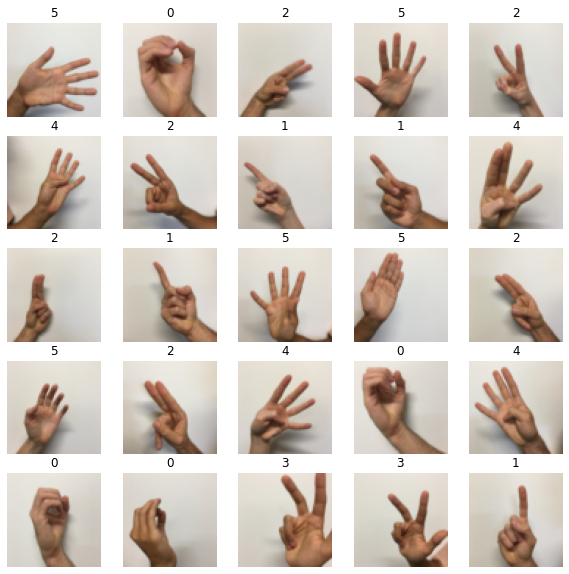

In [315]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow((train_custom_dataset[i]['x']  * 255).astype("uint8").reshape(64, 64, 3))
    plt.title(train_custom_dataset[i]['y'].astype("uint8"))
    plt.axis("off")

# 신경망 모델 구성하기
신경망은 데이터에 대한 연산을 수행하는 계층(layer)/모듈(module)로 구성되어 있습니다. `torch.nn` 네임스페이스는 신경망을 구성하는데 필요한 모든 구성 요소를 제공합니다. PyTorch의 모든 모듈은 `nn.Module` 의 하위 클래스(subclass) 입니다. 신경망은 다른 모듈(계층 layer)로 구성된 모듈입니다. 이러한 중첩된 구조는 복잡한 아키텍처를 쉽게 구축하고 관리할 수 있습니다.

In [316]:
import torch.nn as nn

## 학습을 위한 장치 얻기
가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려고 합니다. `torch.cuda` 를 사용할 수 있는지 확인하고 그렇지 않으면 CPU를 계속 사용합니다.

In [317]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


## 클래스 정의하기
신경망 모델을 nn.Module 의 하위클래스로 정의하고, `__init__`에서 신경망 계층들을 초기화합니다. nn.Module 을 상속받은 모든 클래스는 `forward`메소드에 입력 데이터에 대한 연산들을 구현합니다.
- `nn.Flatten`  
각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다. 
  
  
- `nn.Linear`  
저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈(강의에서 나온 $W$행렬의 전치 형태임에 주의 하세요!)
    - **arguments**
        - in_features: size of input sample
        - out_features: size of output sample
        - bias: if set to `False`, the layer will not learn additive bias(default: `True`)
        
        
- `nn.ReLU`  
ReLU 활성화함수


- `nn.Dropout`  
베르누이 분포로 부터 `p`의 확률로 샘플링해 dropout을 적용
    - **arguments**
        - p: probability of an element to be zeroed(default: 0.5)
        
        
- `nn.BatchNorm1d`  
batch normalization을 수행하는 함수. 
$$y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$$
 
 
- `nn.Softmax`  
신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달될 ([-infty, infty] 범위의 원시 값(raw value)인) logits 를 반환합니다. logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 범위로 비례하여 조정(scale)됩니다. `dim` 매개변수는 값의 합이 1이 되는 차원을 나타냅니다.   
$$\begin{align*}\text{Softmax}(x_{i}) &= \frac{\exp(x_i)}{\sum_j \exp(x_j)}\end{align*}$$
    - **arguments**
        - dim: A dimension along which Softmax will be computed 


- `nn.Sequential`  
`nn.Sequential` 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.

In [318]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        '''
        flatten
        |W1| = (12288, 25)
        |b1| = (25,)
        |W2| = (25, 12)
        |b2| = (12,)
        |W3| = (12, 6)
        |b3| = (6,)
        use batch normalization and dropout(p = .1)
        '''
        torch.manual_seed(1)
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            # YOUR CODE STARTS HERE
            nn.Linear(12288, 25),
            nn.BatchNorm1d(25),
            nn.ReLU(),
            nn.Dropout(.1),
            nn.Linear(25, 12),
            nn.BatchNorm1d(12),
            nn.ReLU(),
            nn.Dropout(.1),
            nn.Linear(12, 6),
            # YOUR CODE ENDS HERE
        )

        
    def forward(self, x):
        x = self.flatten(x)
        pred = self.layers(x)

        return pred

`NeuralNetwork`의 인스턴스(instance)를 생성하고 이를 device로 이동한 뒤, 구조(structure)를 출력합니다.

In [319]:
model = NeuralNetwork()
model.to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=12288, out_features=25, bias=True)
    (1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=25, out_features=12, bias=True)
    (5): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=12, out_features=6, bias=True)
  )
)


**Expected output**
```
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=12288, out_features=25, bias=True)
    (1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=25, out_features=12, bias=True)
    (5): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=12, out_features=6, bias=True)
  )
)
```

In [320]:
torch.manual_seed(1)
x = torch.rand(3, 64, 64, 3, device = device)

# forward propagation
# YOUR CODE STARTS HERE
pred = model(x)
# YOUR CODE END HERE

In [321]:
print(pred)

tensor([[ 0.2972, -0.6080,  0.0152, -0.6040, -0.5947, -0.1909],
        [ 0.0974, -0.3929,  0.0126, -0.5071, -0.1992,  0.1962],
        [ 0.0900, -1.1279,  0.0965, -0.1130, -0.3079,  0.4095]],
       grad_fn=<AddmmBackward0>)


**Expected output**
```
tensor([[ 0.2972, -0.6080,  0.0152, -0.6040, -0.5947, -0.1909],
        [ 0.0974, -0.3929,  0.0126, -0.5071, -0.1992,  0.1962],
        [ 0.0900, -1.1279,  0.0965, -0.1130, -0.3079,  0.4095]],
       grad_fn=<AddmmBackward0>)
```

## 모델 매개변수
신경망 내부의 많은 계층들은 매개변수화(parameterize) 됩니다. 즉, 학습 중에 최적화되는 가중치와 편향과 연관지어집니다. nn.Module 을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적(track)되며, 모델의 `parameters()` 및 `named_parameters()` 메소드로 모든 매개변수에 접근할 수 있게 됩니다.

In [322]:
print(model.parameters())
print()
print(next(iter(model.parameters())))

<generator object Module.parameters at 0x7f7f4afed0b0>

Parameter containing:
tensor([[ 4.6482e-03, -3.9817e-03, -1.7488e-03,  ..., -1.6684e-03,
          6.5970e-03, -2.9200e-03],
        [ 2.8266e-05, -1.8504e-03,  3.7728e-03,  ...,  6.7042e-03,
         -2.8709e-04, -2.0535e-03],
        [-4.8501e-03,  3.8430e-03, -7.6034e-04,  ..., -3.6609e-03,
          2.2825e-03, -2.9446e-03],
        ...,
        [ 5.5895e-03,  1.9082e-03, -3.6884e-03,  ...,  1.5467e-04,
          4.1247e-03, -1.5319e-03],
        [ 2.9350e-03, -7.6573e-03, -1.0524e-03,  ..., -6.9919e-03,
         -6.8638e-05,  6.5960e-03],
        [ 1.1518e-03,  3.9977e-03,  2.3837e-03,  ..., -8.6604e-04,
         -3.8178e-03,  4.2949e-04]], requires_grad=True)


In [323]:
for name, param in model.named_parameters():
    print(f'Layer: {name}')
    print(f'Size: {param.size()}')
    print()

Layer: layers.0.weight
Size: torch.Size([25, 12288])

Layer: layers.0.bias
Size: torch.Size([25])

Layer: layers.1.weight
Size: torch.Size([25])

Layer: layers.1.bias
Size: torch.Size([25])

Layer: layers.4.weight
Size: torch.Size([12, 25])

Layer: layers.4.bias
Size: torch.Size([12])

Layer: layers.5.weight
Size: torch.Size([12])

Layer: layers.5.bias
Size: torch.Size([12])

Layer: layers.8.weight
Size: torch.Size([6, 12])

Layer: layers.8.bias
Size: torch.Size([6])



# 모델 매개변수 최적화하기
이제 모델과 데이터가 준비되었으니, 데이터에 매개변수를 최적화하여 모델을 학습하고, 검증하고, 테스트할 차례입니다. 모델을 학습하는 과정은 반복적인 과정을 거칩니다. (에폭(epoch)이라고 부르는) 각 반복 단계에서 모델은 출력을 추측하고, 추측과 정답 사이의 오류(손실(loss))를 계산하고, 매개변수에 대한 오류의 도함수(derivative)를 수집한 뒤, 경사하강법을 사용하여 이 파라미터들을 `최적화(optimize)`합니다. 

## 하이퍼파라미터(Hyperparameter)
하이퍼파라미터(Hyperparameter)는 모델 최적화 과정을 제어할 수 있는 조절 가능한 매개변수입니다. 서로 다른 하이퍼파라미터 값은 모델 학습과 수렴율(convergence rate)에 영향을 미칠 수 있습니다.

학습 시에는 다음과 같은 하이퍼파라미터를 정의합니다:
- 에폭(epoch) 수 - 데이터셋을 반복하는 횟수

- 배치 크기(batch size) - 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수

- 학습률(learning rate) - 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을수록 학습 속도가 느려지고, 값이 크면 학습 중 예측할 수 없는 동작이 발생할 수 있습니다.

In [324]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## 손실 함수(loss function)
학습용 데이터를 제공하면, 학습되지 않은 신경망은 정답을 제공하지 않을 확률이 높습니다. 손실 함수(loss function)는 획득한 결과와 실제 값 사이의 틀린 정도(degree of dissimilarity)를 측정하며, 학습 중에 이 값을 최소화하려고 합니다. 주어진 데이터 샘플을 입력으로 계산한 예측과 정답(label)을 비교하여 손실(loss)을 계산합니다.

일반적인 손실함수에는 회귀 문제(regression task)에 사용하는 `nn.MSELoss`(평균 제곱 오차(MSE; Mean Square Error))나 분류(classification)에 사용하는 `nn.NLLLoss` (음의 로그 우도(Negative Log Likelihood)), 그리고 nn.LogSoftmax와 nn.NLLLoss를 합친 `nn.CrossEntropyLoss` 등이 있습니다.

모델의 출력 로짓(logit)을 nn.CrossEntropyLoss에 전달하여 로짓(logit)을 정규화하고 예측 오류를 계산합니다.

In [325]:
loss_fn = nn.CrossEntropyLoss()

In [326]:
loss_fn

CrossEntropyLoss()

## 옵티마이저(Optimizer)
최적화는 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정하는 과정입니다. 최적화 알고리즘은 이 과정이 수행되는 방식을 정의합니다. 모든 최적화 절차(logic)는 optimizer 객체에 캡슐화(encapsulate)됩니다. PyTorch에는 `ADAM`이나 `RMSProp`과 같은 다른 종류의 모델과 데이터에서 더 잘 동작하는 다양한 옵티마이저가 있습니다.

학습하려는 `모델의 매개변수`와 `학습률(learning rate)` 하이퍼파라미터를 등록하여 옵티마이저를 초기화합니다.

In [327]:
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [328]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

## 학습 Loop(train_loop)
학습 단계(loop)에서 최적화는 세단계로 이뤄집니다.
- `optimizer.zero_grad()`를 호출하여 모델 매개변수의 변화도를 재설정합니다. 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다.

- `loss.backwards()`를 호출하여 예측 손실(prediction loss)을 역전파합니다. PyTorch는 각 매개변수에 대한 손실의 변화도를 저장합니다.

- 변화도를 계산한 뒤에는 `optimizer.step()`을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정합니다.

In [329]:
def train_loop(train_loader, model, loss_fn, optimizer):
    epoch_loss = 0
    for idx, mini_batch in enumerate(train_loader):
        x = mini_batch['x'].type(torch.float32)
        y = mini_batch['y']
        
        # forward propagation
        y_hat = model(x)
        cost = loss_fn(y_hat, y)
        
        # backward propagation
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        epoch_loss += float(cost)
        
        if idx % 5 == 0:
            print(f'[{str(idx + 1).zfill(2)}|{len(train_loader)}]loss: {np.round(float(cost), 5)}')
            
    epoch_loss = epoch_loss / len(train_loader)
    
    return epoch_loss

## 평가 Loop(test_loop)
학습 Loop와 동일한 과정을 거치지만 gradient descent가 필요 없기 때문에 `torch.no_grad()`로 미분값을 계산하지 않습니다. 또한 `optimizer.zero_grad()`와 `optimizer.step()`의 과정이 필요하지 않습니다.

In [330]:
def test_loop(test_loader, model, loss_fn):
    epoch_loss = 0
    correct = 0
    for mini_batch in test_loader:
        x = mini_batch['x'].type(torch.float32)
        y = mini_batch['y']
        
        with torch.no_grad():
            # forward propagation
            y_hat = model(x)
            cost = loss_fn(y_hat, y)
            
            epoch_loss += float(cost)
            correct += (y_hat.argmax(dim  = -1) == y).sum().item()
            
    epoch_loss = epoch_loss / len(test_loader)
    accuracy = correct / len(test_loader.dataset)
    print(f'Test Error: \n Accuracy: {(100 * accuracy)}%, Loss: {epoch_loss}\n')
    
    return epoch_loss

## 최적화 단계(Optimization Loop)
하이퍼파라미터를 설정한 뒤에는 최적화 단계를 통해 모델을 학습하고 최적화할 수 있습니다. 최적화 단계의 각 반복(iteration)을 에폭이라고 부릅니다.

하나의 에폭은 다음 두 부분으로 구성됩니다:
학습 단계(train loop) - 학습용 데이터셋을 반복(iterate)하고 최적의 매개변수로 수렴합니다.

검증/테스트 단계(validation/test loop) - 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터셋을 반복(iterate)합니다.

In [331]:
def train(train_loader, test_loader, model, loss_fn, optimizer, n_epochs, plot = True):
    train_losses = []
    test_losses = []
    for epoch in range(1, n_epochs + 1):
        print(f'--- Epoch {epoch} ---')
        train_loss = train_loop(train_loader, model, loss_fn, optimizer)
        test_loss = test_loop(test_loader, model, loss_fn)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
    if plot:
        plt.figure(figsize = (10, 6))
        plt.plot(range(1, n_epochs + 1), train_losses, color = 'dodgerblue', label = 'Train')
        plt.plot(range(1, n_epochs + 1), test_losses, color = 'limegreen', label = 'Test')
        plt.title('Loss')
        plt.legend();

--- Epoch 1 ---
[01|17]loss: 1.85781
[06|17]loss: 1.75293
[11|17]loss: 1.66953
[16|17]loss: 1.53069
Test Error: 
 Accuracy: 39.166666666666664%, Loss: 1.5447035431861877

--- Epoch 2 ---
[01|17]loss: 1.5659
[06|17]loss: 1.53745
[11|17]loss: 1.4446
[16|17]loss: 1.45565
Test Error: 
 Accuracy: 52.5%, Loss: 1.4178199768066406

--- Epoch 3 ---
[01|17]loss: 1.4173
[06|17]loss: 1.39427
[11|17]loss: 1.3968
[16|17]loss: 1.29545
Test Error: 
 Accuracy: 55.00000000000001%, Loss: 1.3409740328788757

--- Epoch 4 ---
[01|17]loss: 1.29742
[06|17]loss: 1.26336
[11|17]loss: 1.25874
[16|17]loss: 1.23224
Test Error: 
 Accuracy: 68.33333333333333%, Loss: 1.249654471874237

--- Epoch 5 ---
[01|17]loss: 1.17191
[06|17]loss: 1.14735
[11|17]loss: 1.20376
[16|17]loss: 1.05668
Test Error: 
 Accuracy: 79.16666666666666%, Loss: 1.120176911354065

--- Epoch 6 ---
[01|17]loss: 1.07702
[06|17]loss: 1.03651
[11|17]loss: 1.05687
[16|17]loss: 1.01483
Test Error: 
 Accuracy: 76.66666666666667%, Loss: 1.0144028663635254

[11|17]loss: 0.05603
[16|17]loss: 0.05276
Test Error: 
 Accuracy: 90.0%, Loss: 0.30485425889492035

--- Epoch 53 ---
[01|17]loss: 0.03645
[06|17]loss: 0.03219
[11|17]loss: 0.04225
[16|17]loss: 0.12051
Test Error: 
 Accuracy: 85.83333333333333%, Loss: 0.47190262377262115

--- Epoch 54 ---
[01|17]loss: 0.06732
[06|17]loss: 0.10096
[11|17]loss: 0.09546
[16|17]loss: 0.06979
Test Error: 
 Accuracy: 89.16666666666667%, Loss: 0.39675531536340714

--- Epoch 55 ---
[01|17]loss: 0.03697
[06|17]loss: 0.15381
[11|17]loss: 0.04295
[16|17]loss: 0.06004
Test Error: 
 Accuracy: 88.33333333333333%, Loss: 0.4225655645132065

--- Epoch 56 ---
[01|17]loss: 0.07734
[06|17]loss: 0.05405
[11|17]loss: 0.0816
[16|17]loss: 0.07804
Test Error: 
 Accuracy: 89.16666666666667%, Loss: 0.304369755089283

--- Epoch 57 ---
[01|17]loss: 0.04611
[06|17]loss: 0.06824
[11|17]loss: 0.06337
[16|17]loss: 0.05605
Test Error: 
 Accuracy: 87.5%, Loss: 0.4271794855594635

--- Epoch 58 ---
[01|17]loss: 0.11139
[06|17]loss: 0.10788

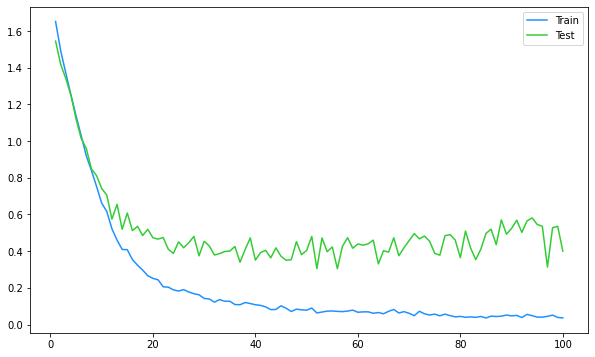

In [332]:
train(train_loader, test_loader, model, loss_fn, optimizer, 100)